<span style="color:blue;">Zomato Data Analysis Project</span>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("Zomato data .csv")
df                 



,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [11]:
# Converted rate column from object to float and modfied it from 4.1/5, 3.8/5 to 4.1, 3.8, and so on...
df['rate'] = df['rate'].str.split('/').str[0]
df['rate'] = df['rate'].astype(float)
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


Text(0.5, 0, 'Types of Restaurants')

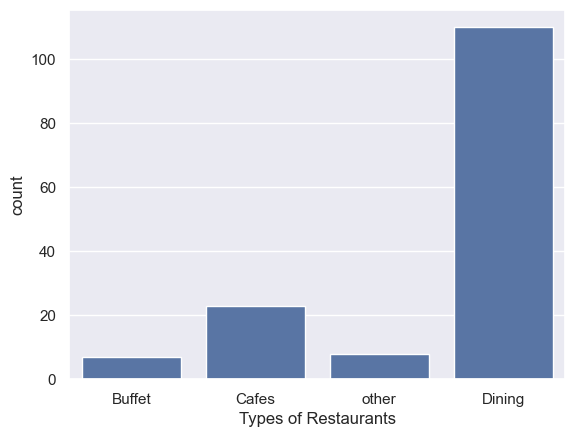

In [39]:
sns.countplot(x=df["listed_in(type)"])
plt.xlabel("Types of Restaurants")

Conclusion: Majority of the orders are from Dining category

In [45]:
grouped_data = df.groupby(["listed_in(type)"])["votes"].sum()
result = pd.DataFrame(grouped_data). reset_index()
result

,listed_in(type),votes
0,Buffet,3028
1,Cafes,6434
2,Dining,20363
3,other,9367


Text(0, 0.5, 'Votes')

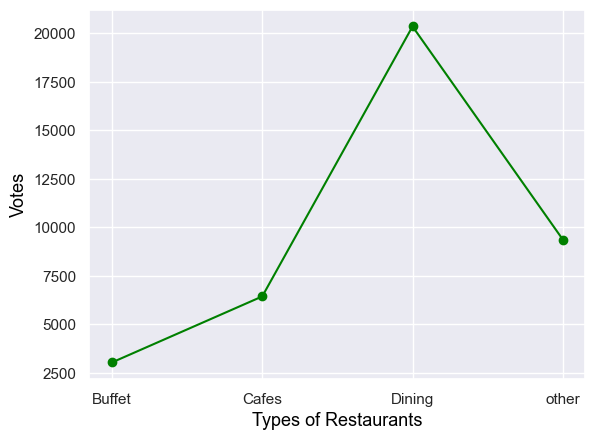

In [51]:
plt.plot(result["listed_in(type)"], result["votes"], c="green", marker="o")
plt.xlabel("Types of Restaurants", c="black", size=13)
plt.ylabel("Votes", c="black", size=13)

Conclusion: Dining restaurants have received maximum votes.

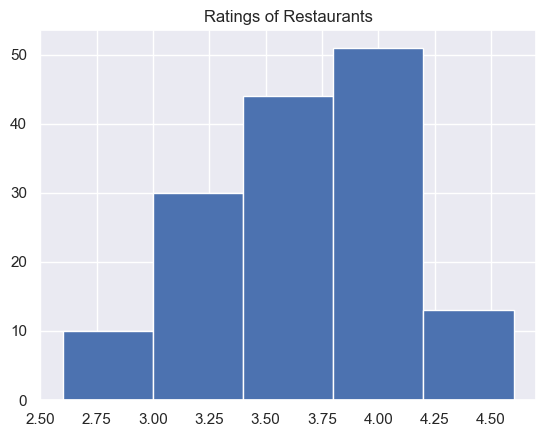

In [53]:
plt.hist(df["rate"], bins = 5)
plt.title("Ratings of Restaurants")
plt.show()

Conclusion: Majority restaurants have received ratiings from 3.5 to 4.0

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

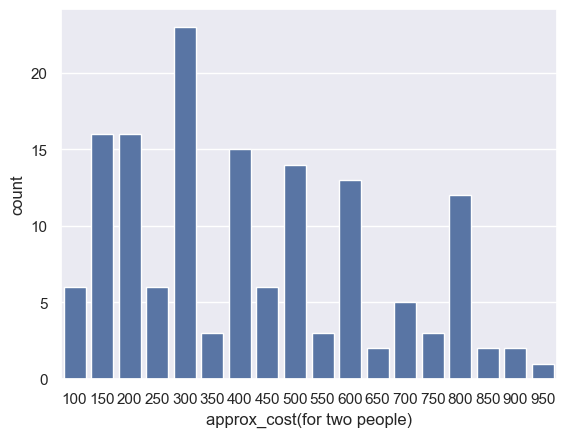

In [55]:
sns.countplot(x=df["approx_cost(for two people)"])

Conclusion: Max order for which couples have ordered is Rs 300

<Axes: xlabel='online_order', ylabel='rate'>

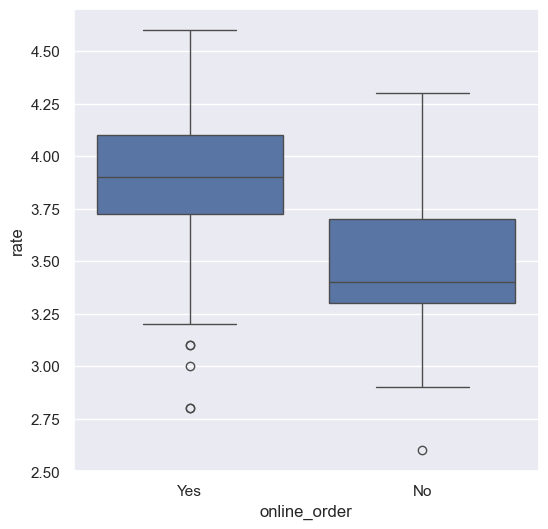

In [56]:
plt.figure(figsize= (6,6))
sns.boxplot( x = "online_order", y = "rate", data =df)

Conclusion: offline orders rceived lower ratings in comparison to online orders.

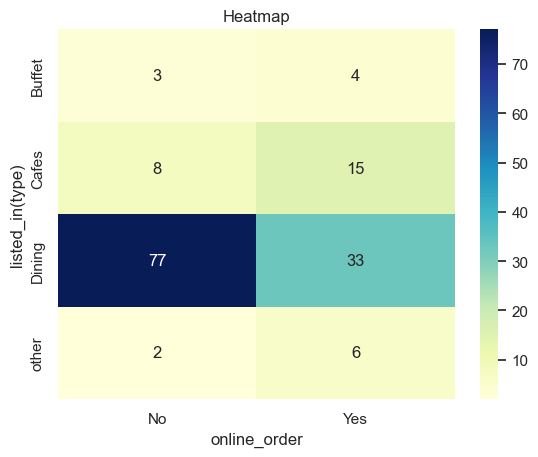

In [57]:
pivot_table = df.pivot_table(index='listed_in(type)',columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("online_order")
plt.ylabel("listed_in(type)")
plt.show()

Conclusion: Dining restaurants receive more offline orders but cafes receive more online orders